In [21]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas_datareader.data as web
import datetime
import pandas as pd 

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
              

In [3]:
btc = web.get_data_yahoo(['BTC-USD'],start = datetime.datetime(2018,1,1),end=datetime.datetime(2022,4,1))
print(btc.head())


Attributes     Adj Close         Close          High           Low  \
Symbols          BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2017-12-31  14156.400391  14156.400391  14377.400391  12755.599609   
2018-01-01  13657.200195  13657.200195  14112.200195  13154.700195   
2018-01-02  14982.099609  14982.099609  15444.599609  13163.599609   
2018-01-03  15201.000000  15201.000000  15572.799805  14844.500000   
2018-01-04  15599.200195  15599.200195  15739.700195  14522.200195   

Attributes          Open       Volume  
Symbols          BTC-USD      BTC-USD  
Date                                   
2017-12-31  12897.700195  12136299520  
2018-01-01  14112.200195  10291200000  
2018-01-02  13625.000000  16846600192  
2018-01-03  14978.200195  16871900160  
2018-01-04  15270.700195  21783199744  


In [11]:
btc.to_csv("btc.csv")

In [3]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date    Adj Close        Close         High          Low        Open  \
0  31/12/2017  14156.40039  14156.40039  14377.40039  12755.59961  12897.7002   
1    1/1/2018  13657.20020  13657.20020  14112.20020  13154.70020  14112.2002   
2    2/1/2018  14982.09961  14982.09961  15444.59961  13163.59961  13625.0000   
3    3/1/2018  15201.00000  15201.00000  15572.79980  14844.50000  14978.2002   
4    4/1/2018  15599.20020  15599.20020  15739.70020  14522.20020  15270.7002   

         Volume  
0  1.213630e+10  
1  1.029120e+10  
2  1.684660e+10  
3  1.687190e+10  
4  2.178320e+10  


In [4]:
btc.index = pd.to_datetime(btc['Date'],format='%d/%m/%Y')

In [5]:
del btc['Date']

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

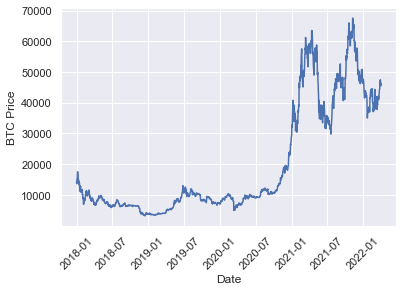

In [7]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['Adj Close'], )

In [8]:

del btc['Close'] 
del btc['High']
del btc['Low']
del btc['Open']
del btc['Volume']

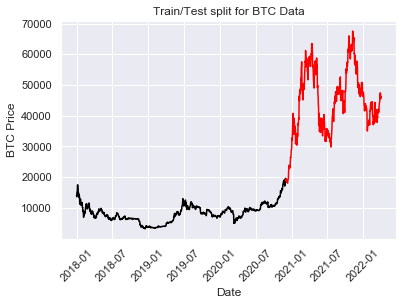

In [9]:
train = btc[btc.index < pd.to_datetime("01/12/2020", format='%d/%m/%Y')]
test = btc[btc.index > pd.to_datetime("01/12/2020", format='%d/%m/%Y')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
y = train['Adj Close']

In [24]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

In [25]:
ARMAmodel = ARMAmodel.fit()

In [26]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARMA = y_pred_df["Predictions"] 

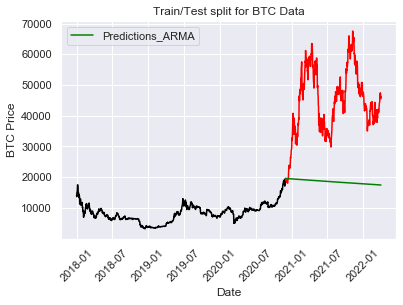

In [27]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
plt.legend()
plt.show()

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Adj Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  28377.608755013254


In [29]:
#from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm

RMSE:  17310.893455617414


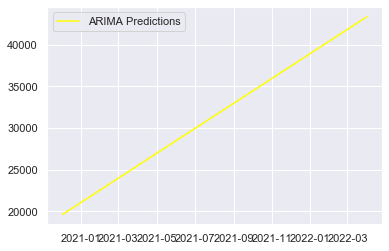

In [30]:
ARIMAmodel = sm.tsa.arima.ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Adj Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

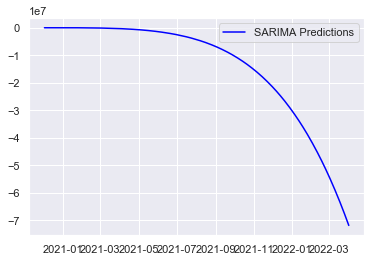

In [31]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_SARMIAX = y_pred_df["Predictions"] 
plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()

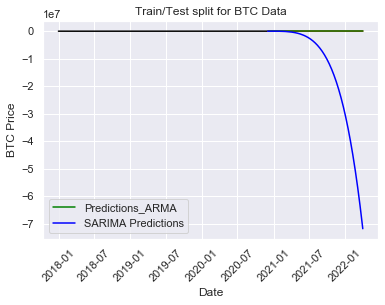

In [32]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

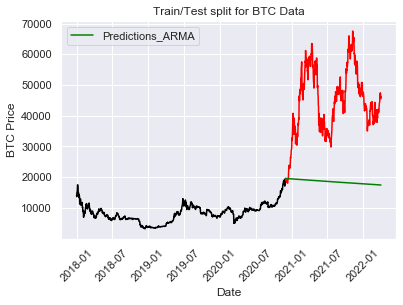

In [33]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
#plt.plot(y_pred_out_SARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

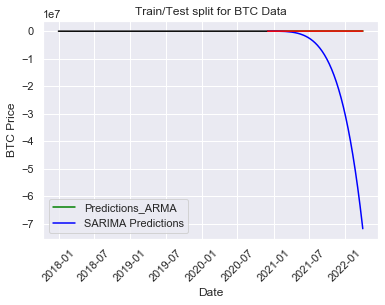

In [34]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.legend()
plt.show()

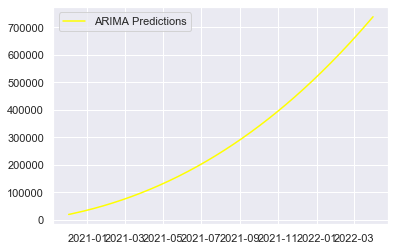

In [35]:
#Trying to Use ARIMA 5,4,2 without seanonality 

ARIMAmodel = SARIMAX(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARIMA = y_pred_df["Predictions"] 
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


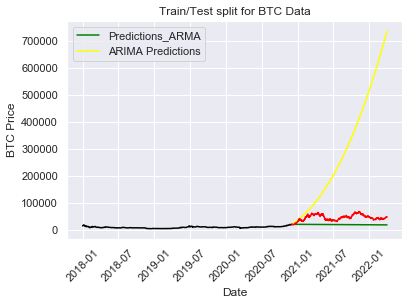

In [36]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
#plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.legend()
plt.show()

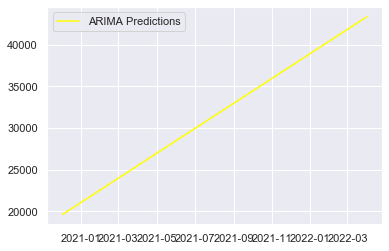

In [37]:
#Trying to Use ARIMA 3,4,2 without seanonality .. ths is a very trial and error model... 

ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARIMA = y_pred_df["Predictions"] 
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


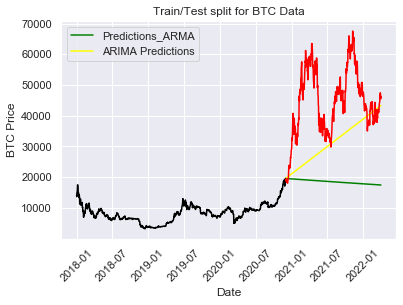

In [38]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
#plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.legend()
plt.show()

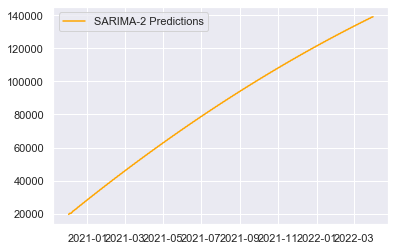

In [39]:
SARIMAXmodel2 = SARIMAX(y, order = (2, 2, 2), seasonal_order=(1,1,0,4))
SARIMAXmodel2 = SARIMAXmodel2.fit()

y_pred = SARIMAXmodel2.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_SARMIAX2 = y_pred_df["Predictions"] 
plt.plot(y_pred_out_SARMIAX2, color='Orange', label = 'SARIMA-2 Predictions')
plt.legend()

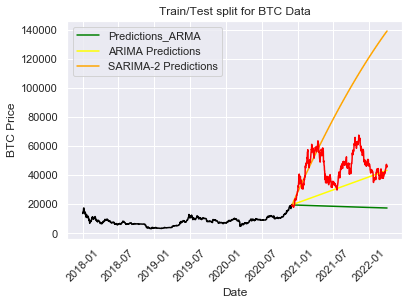

In [40]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
#plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARMIAX2, color='Orange', label = 'SARIMA-2 Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.legend()
plt.show()

# Moving into ARCH - GARCH --- which involves data alot of Volatility 

In [42]:
import arch 
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#based on the volatility variance of the time series ..
#How would we know we need to start with a Garch (2,2) model

ModuleNotFoundError: No module named 'arch'

C:\Users\theiv\Anaconda3\envs\py310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


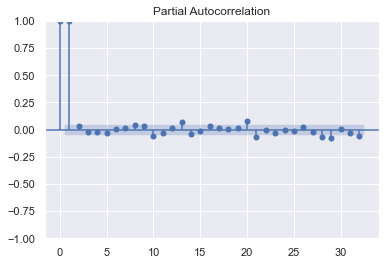

In [41]:
# PACF Plot 
plot_pacf(np.array(btc))
plt.show()

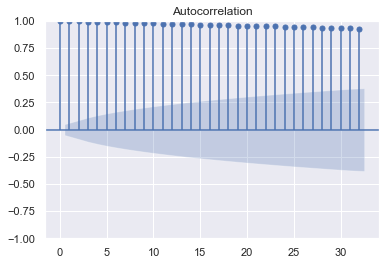

In [42]:
# ACF Plot 
plot_acf(np.array(btc))
plt.show()

In [52]:
# if q = 0, it becomes an ARCH process 
model = arch_model(train, p=1 , q =0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9642.89963946023
Iteration:      2,   Func. Count:      9,   Neg. LLF: 9637.961162458858
Iteration:      3,   Func. Count:     13,   Neg. LLF: 9624.525894642316
Iteration:      4,   Func. Count:     17,   Neg. LLF: 9624.516246543459
Iteration:      5,   Func. Count:     22,   Neg. LLF: 9624.498667216392
Iteration:      6,   Func. Count:     26,   Neg. LLF: 9624.498459006289
Iteration:      7,   Func. Count:     30,   Neg. LLF: 9624.497388593323
Iteration:      8,   Func. Count:     34,   Neg. LLF: 9624.492180781037
Iteration:      9,   Func. Count:     38,   Neg. LLF: 9624.467248349638
Iteration:     10,   Func. Count:     42,   Neg. LLF: 9624.376429174536
Iteration:     11,   Func. Count:     46,   Neg. LLF: 9624.310683009491
Iteration:     12,   Func. Count:     50,   Neg. LLF: 9624.310824221056
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9624.310683010612
            Iterations: 12
  

C:\Users\theiv\Anaconda3\envs\py310\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.221e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [53]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9624.31
Distribution:                  Normal   AIC:                           19254.6
Method:            Maximum Likelihood   BIC:                           19269.5
                                        No. Observations:                 1066
Date:                Sun, Apr 03 2022   Df Residuals:                     1065
Time:                        17:12:07   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          8253.4522    127.684     64.640      0.000 [8.003e+03,8.504e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.4662e+06  1.909e+05     12.921  3.407e-38 [2.092e+06,2.840e+06]
alpha[1]       0.6414  1.972e-02     32.530 4.040e-232     [  0.603,  0.680]
============================================================================

Covariance estimator: robust
"""

In [55]:
predictions=model_fit.forecast(horizon = len(test.index))

In [67]:
#y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = np.sqrt(predictions.variance.values[-1, :])
#SARIMAXmodel2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
#y_pred_df.index = test.index
y_pred_out_ARCH = y_pred_df["Predictions"] 

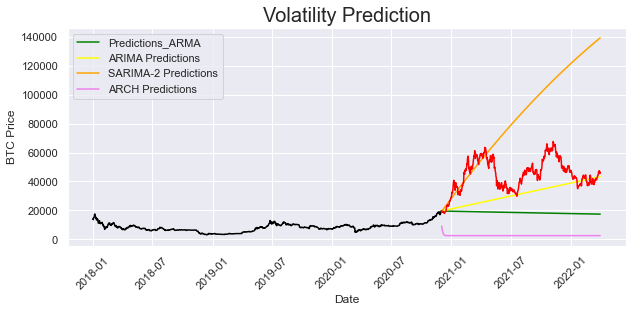

In [68]:

plt.figure(figsize=(10,4))
#true, = plt.plot(test[len(test.index):])
#preds, = plt.plot(predictions.variance.values[-1,:])
plt.title('Volatility Prediction', fontsize = 20)
plt.legend(['True Volatility','Predicted Volatility'], fontsize=16)

plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
#plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions_ARMA')
#plt.plot(y_pred_out_SARMIAX, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARMIAX2, color='Orange', label = 'SARIMA-2 Predictions')
plt.plot(y_pred_out_ARCH, color='Violet', label = 'ARCH Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.legend()
plt.show()